##### ASakai
https://github.com/AtsushiSakai/PythonRobotics/blob/master/Localization/extended_kalman_filter/extended_kalman_filter_localization.ipynb

##### RLabbe
https://github.com/rlabbe/Kalman-and-Bayesian-Filters-in-Python/blob/master/06-Multivariate-Kalman-Filters.ipynb

In [15]:
import os
import json
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

In [16]:
os.path.join(os.getcwd(), 'data')

'C:\\Users\\betty\\OneDrive\\Documents\\GitHub\\theme\\coppelia_robotics\\notebooks\\data'

In [17]:
file_path = os.path.join(os.getcwd(), 'data')
#file_path = os.path.join(os.getcwd())
drive_file = 'drivePath_1116.json'
# message_file = 'drive_messages_200703.json'

def load_json_fstr(fstr):
    with open(os.path.join(file_path, fstr), 'r') as f:
        res = json.load(f)
    return res

drive_data = load_json_fstr(drive_file)
# message_data = load_json_fstr(message_file)

In [18]:
pprint(drive_data)
# pprint(message_data)

[{'gps_x': -0.7892941712671404,
  'gps_y': -1.5711801166225179,
  'odometer_x': -0.815085293866517,
  'odometer_y': -1.6001651473317853},
 {'gps_x': -0.8051763216060728,
  'gps_y': -1.698670635923458,
  'odometer_x': -0.8596116125474091,
  'odometer_y': -1.6116889187623378},
 {'gps_x': -0.8708406151811865,
  'gps_y': -1.627142031689733,
  'odometer_x': -0.9010561936486994,
  'odometer_y': -1.605414039331076},
 {'gps_x': -0.9211723446884041,
  'gps_y': -1.5357374132331942,
  'odometer_x': -0.9473693660573763,
  'odometer_y': -1.6050556163389122},
 {'gps_x': -1.0239373998297994,
  'gps_y': -1.574360754258274,
  'odometer_x': -0.9851919249734109,
  'odometer_y': -1.5893431368682358},
 {'gps_x': -1.0966434950015602,
  'gps_y': -1.5027590530279422,
  'odometer_x': -1.02967551301584,
  'odometer_y': -1.5828742223089594},
 {'gps_x': -1.0809914865976271,
  'gps_y': -1.5647161090103423,
  'odometer_x': -1.0707703330999678,
  'odometer_y': -1.593251747504754},
 {'gps_x': -1.1893453435848511,
  '

Set Initial Conditions

In [19]:
prior_dat = {
#     't': drive_data[0].get('t'),
    'gps_x': 0,
    'gps_y': 0, 
    'odometer_x': 0,
    'odometer_y': 0
#     'theta_control': drive_data[0].get('theta_control'),
#     'theta_sensor': drive_data[0].get('theta_control')
}

x_true = np.array([0, 0])

F = np.identity(2)
P = np.identity(2)
H = np.identity(2)
Q = np.zeros([2,2])
R = np.zeros([2,2])

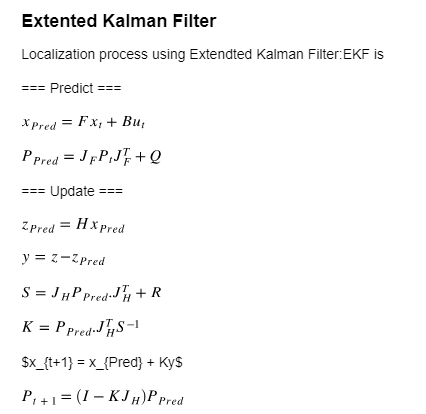

In [20]:
for i, curr_dat in enumerate(drive_data, 1):
#     dt = curr_dat['t'] - prior_dat['t']
    u_t_sensor = np.array(
        [curr_dat['gps_x'] - prior_dat['gps_x'],
         curr_dat['gps_y'] - prior_dat['gps_y']])
#          curr_dat['theta_control'] - prior_dat['theta_control']])
    
    u_t_control = np.array(
        [curr_dat['odometer_x'] - prior_dat['odometer_x'],
         curr_dat['odometer_y'] - prior_dat['odometer_y']])
#          curr_dat['theta_sensor'] - prior_dat['theta_sensor']])
    
    r_control = 10e-2
    J_control = np.array([
        [1, 0],
        [0, 1]])
    
    r_sensor = 10e-2
    J_sensor = np.array([
        [1, 0],
        [0, 1]])
    
        # What to plugin to alpha 1-4?
    alpha_1, alpha_2, alpha_3, alpha_4 = 10e-7, 15e-7, 5e-7, 20e-7
    alpha_1, alpha_2, alpha_3, alpha_4 = (10,) * 4
    qalpha_1, qalpha_2, qalpha_3, qalpha_4 = (1,) * 4
    
    R_t_1_1 = alpha_1 + alpha_2 
    R_t_2_2 = alpha_3 + alpha_4
    R = np.array([
        [R_t_1_1, 0],
        [0, R_t_2_2]
    ])
    
    Q_t_1_1 = qalpha_1 + qalpha_2 
    Q_t_2_2 = qalpha_3 + qalpha_4 
    Q = np.array([
        [Q_t_1_1, 0],
        [0, Q_t_2_2]
    ])
    
    # === Predict ===
    x_pred_control = x_true + u_t_control
    x_pred_sensor = x_true + u_t_sensor
    P_pred = J_control.dot(P).dot(J_control.T) + Q
    # === Update ===
    z_pred_control = H.dot(x_pred_control)
    z_pred_sensor = H.dot(x_pred_sensor)
    y = z_pred_sensor - z_pred_control
    S = J_sensor.dot(P_pred).dot(J_sensor.T) + R
    K = P_pred.dot(J_sensor.T).dot(np.linalg.inv(S))
    x_true = x_pred_control + K.dot(y)
    
    # Review
    print(
        f"x_true: {x_true}"
        # f"\nP {P}"
        f"\ny: {y}"
        f"\n"
    )
    # Setup for Next Iteration
    curr_dat['x_true'] = x_true[0]
    curr_dat['y_true'] = x_true[1]
    prior_dat = curr_dat
        

x_true: [-0.81172123 -1.59638449]
y: [0.02579112 0.02898503]

x_true: [-0.85251136 -1.62303436]
y: [ 0.02864417 -0.11596675]

x_true: [-0.89711503 -1.60824813]
y: [-0.02421971  0.06525372]

x_true: [-0.94395236 -1.59601411]
y: [-0.00401856  0.0910462 ]

x_true: [-0.99024568 -1.58738891]
y: [-0.0649425  -0.05433582]

x_true: [-1.03841047 -1.57242442]
y: [-0.02822251  0.06513279]

x_true: [-1.07210353 -1.58952971]
y: [ 0.05674683 -0.05157953]

x_true: [-1.12455111 -1.60827342]
y: [-0.06429221  0.05440556]

x_true: [-1.14864323 -1.63914683]
y: [0.08707298 0.05307444]

x_true: [-1.20586136 -1.68106238]
y: [-0.14923942 -0.13615766]

x_true: [-1.21645719 -1.709388  ]
y: [0.09909568 0.0380145 ]

x_true: [-1.21987537 -1.7104496 ]
y: [-0.0418192  -0.01586101]

x_true: [-1.27652324 -1.72866219]
y: [-0.05634074 -0.08455327]

x_true: [-1.31380111 -1.71546977]
y: [0.03170062 0.10659691]

x_true: [-1.36377079 -1.70056722]
y: [-0.06829736 -0.01632344]

x_true: [-1.36288649 -1.69914678]
y: [0.07657584

In [21]:
print(drive_data[-1])

{'gps_x': -1.410210509372994, 'gps_y': -1.647167810139356, 'odometer_x': -1.0937892261879418, 'odometer_y': -1.8622646638620275, 'x_true': -1.135061567472949, 'y_true': -1.834208552506896}


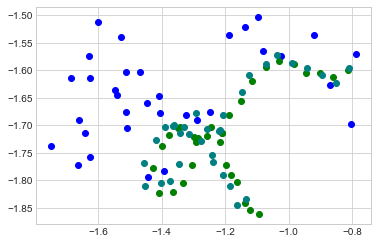

In [22]:
gps_x = [dat.get('gps_x') for dat in drive_data]
gps_y = [dat.get('gps_y') for dat in drive_data]
odometer_x = [dat.get('odometer_x') for dat in drive_data]
odometer_y = [dat.get('odometer_y') for dat in drive_data]
x_true = [dat.get('x_true') for dat in drive_data]
y_true = [dat.get('y_true') for dat in drive_data]

fig = plt.figure()
plt.plot(gps_x, gps_y, 'o', color='blue')
plt.plot(odometer_x, odometer_y, 'o', color='green')
plt.plot(x_true, y_true, 'o', color='teal')
plt.show()
# fig.savefig('plot.png')

In [11]:
print(K.dot(y))

[-0.00715885 -0.01142735]


In [12]:
print(K)

[[0.13043478 0.        ]
 [0.         0.13043478]]


In [10]:
R = np.zeros([3,3])
print(R)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
